In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split


from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.models import model_from_json

In [2]:
print(os.listdir('../own_dataset/2d6_zoom/train'))

['5', '1', '4', '3', '6', '2']


In [3]:
train_path= ('../own_dataset/2d6_zoom/train')
test_path= ('../own_dataset/2d6_zoom/test')

In [4]:
batch_size_train=30  #,batch_size= batch_size_train
batch_size_valid=30
targetsize= 150
datagen=ImageDataGenerator(rotation_range=360,brightness_range=[0.7,1.2],height_shift_range=0.1
                           ,width_shift_range=0.1,zoom_range=[0.7,1.1])
train_batches= datagen.flow_from_directory(train_path, target_size=(targetsize,targetsize), 
                                           classes=os.listdir('../own_dataset/2d6_zoom/train'),
                                           batch_size= batch_size_train)
test_batches= datagen.flow_from_directory(test_path,  target_size=(targetsize,targetsize), 
                                           classes=os.listdir('../own_dataset/2d6_zoom/test'),
                                           batch_size= batch_size_train)

Found 6408 images belonging to 6 classes.
Found 1324 images belonging to 6 classes.


In [5]:
def plots(ims, figsize=(20,10), rows=1, interp= False, titles= None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims= ims.transpose((0,1,2,3))
    f= plt.figure(figsize=figsize)
    cols= len(ims)//rows if len(ims) %2 == 0 else len(ims)//rows + 1
    for i in range(5):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

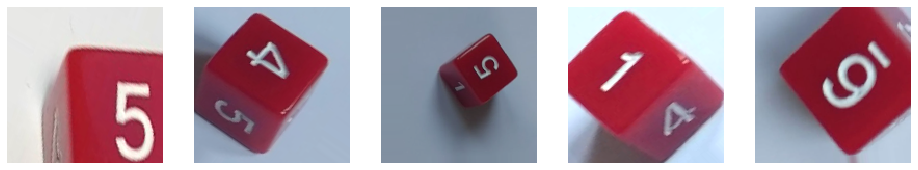

In [6]:
plots(train_batches[1][0],figsize=(100,70))

In [7]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 *0.95**x)

In [8]:
cp_callback=tf.keras.callbacks.ModelCheckpoint(filepath=os.getcwd(),save_weights_only=True,verbose=1)

In [9]:
#model.save('/home/ordovas/IRONHACK/dice-scores-recognition/model_d6_augmented_c1.h5')

In [10]:

model2 = Sequential()
model2.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(targetsize,targetsize, 3)) )
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='SAME', activation='relu'))
model2.add(MaxPooling2D((2, 2)))


model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='SAME', activation='relu'))
model2.add(MaxPooling2D((2, 2)))

#model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='SAME', activation='relu'))
#model2.add(MaxPooling2D((2, 2)))

#model2.add(Conv2D(filters=512, kernel_size=(3,3), padding='SAME', activation='relu'))
#model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(6, activation='softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

In [13]:
model2.compile(Adam(lr=.0002), loss='categorical_crossentropy', metrics= ['accuracy'])
history2= model2.fit_generator(train_batches, steps_per_epoch= len(train_batches) , callbacks=[reduce_lr],
                             validation_data=test_batches, validation_steps= len(test_batches), 
                             epochs=50)

Epoch 1/50
214/214 [==============================] - 270s 1s/step - loss: 2.0830 - accuracy: 0.1915 - val_loss: 1.7828 - val_accuracy: 0.1971 - lr: 0.0010
Epoch 2/50
214/214 [==============================] - 311s 1s/step - loss: 1.7809 - accuracy: 0.1832 - val_loss: 1.7798 - val_accuracy: 0.1843 - lr: 9.5000e-04
Epoch 3/50
214/214 [==============================] - 307s 1s/step - loss: 1.7771 - accuracy: 0.1893 - val_loss: 1.7828 - val_accuracy: 0.2054 - lr: 9.0250e-04
Epoch 4/50
214/214 [==============================] - 306s 1s/step - loss: 1.7781 - accuracy: 0.2038 - val_loss: 1.7785 - val_accuracy: 0.1941 - lr: 8.5737e-04
Epoch 5/50
214/214 [==============================] - 296s 1s/step - loss: 1.7762 - accuracy: 0.2035 - val_loss: 1.7799 - val_accuracy: 0.1979 - lr: 8.1451e-04
Epoch 6/50
214/214 [==============================] - 322s 2s/step - loss: 1.7768 - accuracy: 0.1987 - val_loss: 1.7839 - val_accuracy: 0.1956 - lr: 7.7378e-04
Epoch 7/50
182/214 [========================

KeyboardInterrupt: 

In [ ]:
cp_callback=tf.keras.callbacks.ModelCheckpoint(filepath=os.getcwd(),save_weights_only=True,verbose=1)

In [ ]:
model2.save('model_2d6_zoom2.h5')

In [ ]:
model2_json = model2.to_json()
with open("model_2d6_zoom2.json", "w") as json_file:
    json_file.write(model2_json)

In [ ]:
# https://machinelearningmastery.com/save-load-keras-deep-learning-models/

